In [1]:
# Импортирую библиотеки, загружаю и создаю датасеты, с которыми в дальнейшем будем работать

import pandas as pd
import numpy as np
import datetime
import scipy.stats 
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


%matplotlib inline



df_first = pd.read_csv('trade-history-2021-11-07.csv')
df_middle = pd.read_csv('trade-history-2022-10-10.csv')
df_last = pd.read_csv('trade-history-2023-11-01.csv')


def big_dataset(dataframe_first, dataframe_last):
    ### Concatinations dataframes
    return pd.concat([dataframe_first, dataframe_last], ignore_index=True).drop_duplicates()


big_df_1 = pd.concat([df_middle, df_first], ignore_index=True).drop_duplicates()
big_df = pd.concat([df_last, big_df_1], ignore_index=True).drop_duplicates()

# сортировка по годам
df_2021 = big_df[big_df['Дата/время'].str.contains("2021")]
df_2022 = big_df[big_df['Дата/время'].str.contains("2022")]
df_2023 = big_df[big_df['Дата/время'].str.contains("2023")]

# сортировка по месяцам
df_jan_2021 = df_2021[df_2021['Дата/время'].str.contains(".01.2021")]
df_feb_2021 = df_2021[df_2021['Дата/время'].str.contains(".02.2021")]
df_mar_2021 = df_2021[df_2021['Дата/время'].str.contains(".03.2021")]
df_apr_2021 = df_2021[df_2021['Дата/время'].str.contains(".04.2021")]
df_may_2021 = df_2021[df_2021['Дата/время'].str.contains(".05.2021")]
df_jun_2021 = df_2021[df_2021['Дата/время'].str.contains(".06.2021")]
df_jul_2021 = df_2021[df_2021['Дата/время'].str.contains(".07.2021")]
df_avg_2021 = df_2021[df_2021['Дата/время'].str.contains(".08.2021")]
df_sep_2021 = df_2021[df_2021['Дата/время'].str.contains(".09.2021")]
df_oct_2021 = df_2021[df_2021['Дата/время'].str.contains(".10.2021")]
df_nov_2021 = df_2021[df_2021['Дата/время'].str.contains(".11.2021")]
df_dec_2021 = df_2021[df_2021['Дата/время'].str.contains(".12.2021")]

df_jan_2022 = df_2022[df_2022['Дата/время'].str.contains(".01.2022")]
df_feb_2022 = df_2022[df_2022['Дата/время'].str.contains(".02.2022")]
df_mar_2022 = df_2022[df_2022['Дата/время'].str.contains(".03.2022")]
df_apr_2022 = df_2022[df_2022['Дата/время'].str.contains(".04.2022")]
df_may_2022 = df_2022[df_2022['Дата/время'].str.contains(".05.2022")]
df_jun_2022 = df_2022[df_2022['Дата/время'].str.contains(".06.2022")]
df_jul_2022 = df_2022[df_2022['Дата/время'].str.contains(".07.2022")]
df_avg_2022 = df_2022[df_2022['Дата/время'].str.contains(".08.2022")]
df_sep_2022 = df_2022[df_2022['Дата/время'].str.contains(".09.2022")]
df_oct_2022 = df_2022[df_2022['Дата/время'].str.contains(".10.2022")]
df_nov_2022 = df_2022[df_2022['Дата/время'].str.contains(".11.2022")]
df_dec_2022 = df_2022[df_2022['Дата/время'].str.contains(".12.2022")]

df_jan_2023 = df_2023[df_2023['Дата/время'].str.contains(".01.2023")]
df_feb_2023 = df_2023[df_2023['Дата/время'].str.contains(".02.2023")]
df_mar_2023 = df_2023[df_2023['Дата/время'].str.contains(".03.2023")]
df_apr_2023 = df_2023[df_2023['Дата/время'].str.contains(".04.2023")]
df_may_2023 = df_2023[df_2023['Дата/время'].str.contains(".05.2023")]
df_jun_2023 = df_2023[df_2023['Дата/время'].str.contains(".06.2023")]
df_jul_2023 = df_2023[df_2023['Дата/время'].str.contains(".07.2023")]
df_avg_2023 = df_2023[df_2023['Дата/время'].str.contains(".08.2023")]
df_sep_2023 = df_2023[df_2023['Дата/время'].str.contains(".09.2023")]
df_oct_2023 = df_2023[df_2023['Дата/время'].str.contains(".10.2023")]
df_nov_2023 = df_2021[df_2021['Дата/время'].str.contains(".11.2023")]
df_dec_2023 = df_2023[df_2023['Дата/время'].str.contains(".12.2023")]

In [2]:
# Считаем временой период торговли
def time_period(dataframe):
    all_dates = dataframe['Дата/время'].tolist()
    start = all_dates[-1]
    end = all_dates[0]
    start_dtm = datetime.datetime.strptime(start, '%d.%m.%Y %H:%M')
    end_dtm = datetime.datetime.strptime(end, '%d.%m.%Y %H:%M')
    print(f'\nПроизведён анализ временного периода торговли: с {start} по {end}'
          f'\nчто составляет {end_dtm - start_dtm} \n')

def time_period_1(dataframe):
    all_dates = dataframe['Дата/время'].tolist()
    start = all_dates[-1]
    end = all_dates[0]
    start_dtm = datetime.datetime.strptime(start, '%d.%m.%Y %H:%M')
    end_dtm = datetime.datetime.strptime(end, '%d.%m.%Y %H:%M')
    return start_dtm, end_dtm

# список всех валютных пар 
def all_pairs_list(dataframe):
    return dataframe['Валютная пара'].unique().tolist()

# Датасет по валютной паре 
def df_curr_pair(dataframe, current_pair):
    current = str(current_pair.upper())
    return dataframe.loc[(dataframe['Валютная пара'] == current)]

# Список датасетов по каждой валютной паре
def dataframe_pairs_list(dataframe):
    all_pairs_list = dataframe['Валютная пара'].unique().tolist()	
    dataframe_all_pairs_list = []
    for el in all_pairs_list:
        dataframe_all_pairs_list.append(df_curr_pair(dataframe, el))
    return dataframe_all_pairs_list


In [50]:
df_oct_2023

,Дата/время,Trade ID,Тип,Валютная пара,Количество,Цена,Сумма,Тип комиссии,Размер комиссии,Комиссия %
0,31.10.2023 18:36,534223104,sell,EXM_ETH,248.711879,4.300000e-06,0.001069,maker,1.060000e-06,0.1%
1,31.10.2023 18:36,534223102,sell,EXM_ETH,107.359926,4.300000e-06,0.000462,maker,4.600000e-07,0.1%
2,31.10.2023 17:40,534201718,buy,EXM_ETH,122.959524,4.200000e-06,0.000516,maker,1.229595e-01,0.1%
3,31.10.2023 16:11,534167449,buy,USDT_KZT,1.707396,4.630000e+02,790.524542,maker,5.122180e-03,0.3%
4,31.10.2023 15:37,534154242,buy,USDT_KZT,13.419450,4.630000e+02,6213.205456,maker,4.025835e-02,0.3%
...,...,...,...,...,...,...,...,...,...,...
376,01.10.2023 06:07,521820188,sell,EXM_BTC,259.259259,2.700000e-07,0.000070,maker,6.000000e-08,0.1%
377,01.10.2023 06:07,521820187,sell,EXM_BTC,175.312055,2.700000e-07,0.000047,taker,4.000000e-08,0.1%
378,01.10.2023 06:07,521820103,sell,EXM_ETH,249.622727,4.400000e-06,0.001098,maker,1.090000e-06,0.1%
379,01.10.2023 06:06,521819916,buy,EXM_BTC,1153.750000,2.800000e-07,0.000323,taker,1.153750e+00,0.1%


In [56]:
a = df_curr_pair(big_df, 'EXM_BTC')

In [57]:
a

,Дата/время,Trade ID,Тип,Валютная пара,Количество,Цена,Сумма,Тип комиссии,Размер комиссии,Комиссия %
20,30.10.2023 22:17,533896648,sell,EXM_BTC,2195.000000,2.300000e-07,0.000505,maker,5.000000e-07,0.1%
49,30.10.2023 02:00,533546423,sell,EXM_BTC,548.514510,2.200000e-07,0.000121,maker,1.200000e-07,0.1%
60,29.10.2023 18:15,533412987,buy,EXM_BTC,549.062626,2.100000e-07,0.000115,maker,5.490626e-01,0.1%
165,27.10.2023 00:54,532308535,buy,EXM_BTC,2200.954545,2.200000e-07,0.000484,maker,2.200955e+00,0.1%
172,26.10.2023 11:30,532054036,sell,EXM_BTC,1767.760679,2.300000e-07,0.000407,maker,4.000000e-07,0.1%
...,...,...,...,...,...,...,...,...,...,...
24641,04.06.2021 14:11,277598553,sell,EXM_BTC,170.760048,1.260000e-06,0.000215,maker,6.400000e-07,0.3%
24652,04.06.2021 12:41,277578544,buy,EXM_BTC,1680.127794,1.250000e-06,0.002100,maker,5.040383e+00,0.3%
24653,04.06.2021 12:41,277578529,buy,EXM_BTC,2090.858413,1.250000e-06,0.002614,maker,6.272575e+00,0.3%
24654,04.06.2021 12:41,277578518,buy,EXM_BTC,636.997793,1.250000e-06,0.000796,maker,1.910993e+00,0.3%


In [58]:
d = a.loc[:,['Дата/время','Цена']]

In [59]:
d['Дата/время']

20       30.10.2023 22:17
49       30.10.2023 02:00
60       29.10.2023 18:15
165      27.10.2023 00:54
172      26.10.2023 11:30
               ...       
24641    04.06.2021 14:11
24652    04.06.2021 12:41
24653    04.06.2021 12:41
24654    04.06.2021 12:41
26496    21.04.2021 11:51
Name: Дата/время, Length: 1602, dtype: object

In [47]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1155 entries, 0 to 25745
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Дата/время  1155 non-null   object 
 1   Цена        1155 non-null   float64
dtypes: float64(1), object(1)
memory usage: 27.1+ KB


In [49]:
len(d)

1155

/tmp/ipykernel_90024/679837177.py:1: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  d['Дата/время'] = pd.to_datetime(d['Дата/время'])


<Axes: xlabel='Дата/время'>

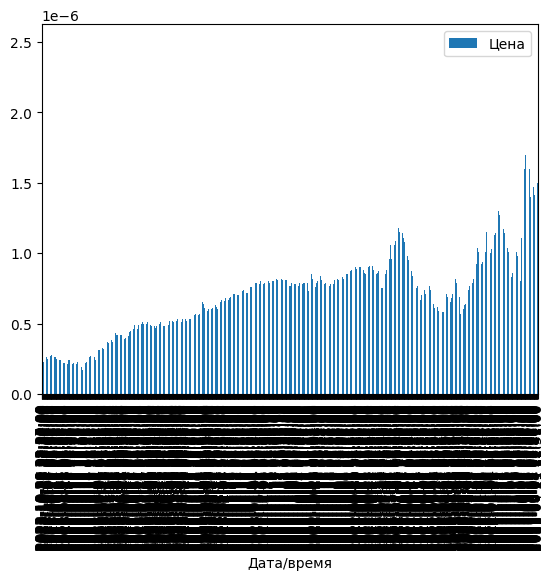

In [60]:
d['Дата/время'] = pd.to_datetime(d['Дата/время'])
d.set_index('Дата/время', inplace=True)

d.plot(y='Цена', kind='bar')

In [61]:
time_period(a)


Произведён анализ временного периода торговли: с 21.04.2021 11:51 по 30.10.2023 22:17
что составляет 922 days, 10:26:00 



In [11]:
b = a[0]

In [24]:
d = b.loc[:,['Дата/время','Цена']]

In [ ]:
d['date'] = pd.to_datetime(d['date'], format='%d.%m.%Y')

# Установка столбца 'Дата сделки' как индекс
d.set_index('date', inplace=True)